<a href="https://colab.research.google.com/github/ryanleeallred/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

In [80]:
!ls
!head -n 100 house-votes-84.names

house-votes-84.data
house-votes-84.names
LS_DS_121_Statistics_Probability_and_Inference.ipynb
LS_DS_121_Statistics_Probability_Assignment.ipynb
notes.txt
1. Title: 1984 United States Congressional Voting Records Database

2. Source Information:
    (a) Source:  Congressional Quarterly Almanac, 98th Congress, 
                 2nd session 1984, Volume XL: Congressional Quarterly Inc. 
                 Washington, D.C., 1985.
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987 

3. Past Usage
   - Publications
     1. Schlimmer, J. C. (1987).  Concept acquisition through 
        representational adjustment.  Doctoral dissertation, Department of 
        Information and Computer Science, University of California, Irvine, CA.
        -- Results: about 90%-95% accuracy appears to be STAGGER's asymptote
     - Predicted attribute: party affiliation (2 classes)

4. Relevant Information:
      This data set includes votes for each of the U.S. House of

In [2]:
### YOUR CODE STARTS HERE
from scipy import stats
import pandas as pd      #probably can do this all without dataframes but im feeling lazy
import numpy as np
import re
#LOAD DATA , CHECK FORMAT.
#using https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records
#per the data description the "?" indicates that the member was present and either abstained or used 
#procedure to avoid voting on the issue therefore we are going to class this result with nays as in 
# 'not willing to support'
# An alternative woud be to simply calculate the ratio of yeas to nays, but i dont think this reflects the 
# reality of how voting works in practice. an absolute number of yeas is required to pass a bill
# what about 1, 0, -1  for mapping? 
# note ryan just dropped the nans inline 

start = re.compile("7.\sAttribute")                 #regex practice, python is wierd..
pat = re.compile(r'\s+\d+.\s([A-Za-z-\s]+):\s\d\s')  #extract column names
columns=[]
with open('house-votes-84.names', 'r') as f:
    line = f.readline()
    cnt = 1
    while line:
        if start.match(line):
            line = f.readline()  #read next line and process. until done and break
            while pat.match(line):
            #    print(pat.match(line).group(1))  #print the match -> add to lis    
                line = f.readline()  #read next line and process.
                
        else:
            line = f.readline() #not started, read nextline
            cnt += 1
##that was fun
with open('house-votes-84.names', 'r') as f:
    txt = f.read()
    columns = pat.findall(txt)                   #this is what we want
df= pd.read_csv('house-votes-84.data', names=columns)



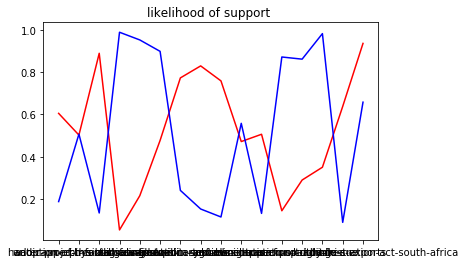

,party_x,issue,mean_x,pty_voters_x,party_y,mean_y,pty_voters_y,delta,absd
1,democrat,water-project-cost-sharing,0.502092,239,republican,0.506757,148,-0.004665,0.004665
9,democrat,immigration,0.471483,263,republican,0.557576,165,-0.086093,0.086093


In [143]:
import matplotlib.pyplot as plt

df = df.replace({"y": 1, "n": 0, "?": np.NaN})
def pfilter(p):                       #filter function for iteration
 return df['Class Name'] == p 

rep = df[pfilter('republican')]   
dem = df[pfilter('democrat')]   

# loop thru all issues


def partystats (p):                 #the dataframe
    #print(p)
    means_by_party = pd.DataFrame(columns= ['party', 'issue', 'mean','pty_voters'])
    i = 1   
    while i < len(columns):  #loop thru columnscolumns[17]
        issue = columns[i]
        #print(party, issue, df[pfilter(p)][issue].dropna().mean() ,  df[pfilter(p)][issue].dropna().count()) 
        means_by_party.loc[i] = [p, issue, df[pfilter(p)][issue].dropna().mean(), df[pfilter(p)][issue].dropna().count()]
        i += 1
    return means_by_party

plt.plot(partystats('democrat')['issue'], partystats('democrat')['mean'], 'r')
plt.plot(partystats('republican')['issue'], partystats('republican')['mean'], 'b')
plt.title('likelihood of support ')
plt.show()                        #red is repub blue i dem. shows issues with divergence and convergenceplt.plot(partystats('democrat')['issue'], partystats('democrat')['mean'], 'r')

demm = partystats('democrat')
repm = partystats('republican')
combined = demm.merge(repm, on='issue')
combined['delta'] = combined['mean_x'] - combined['mean_y']

combined.sort_values('delta').tail(2)           ## 2 issue with the largest difference where dems support
combined.sort_values('delta').head(2)           ## 2 issue with the largest difference where repub support
combined['absd'] = combined['delta'].apply(lambda d : abs(d))
combined.sort_values('absd').head(5)            ## 2 issues where the means are closest



#iffs['rmean'] =diffs.applypartystats('republican')


In [158]:
#2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
print(combined.sort_values('delta').tail(2))           ## 2 issue with the largest difference where dems support
#NULL HYPOTHESIS: There is a statistically significant difference (in favor of the democrats) between the voting
#                 probabilities of the two parties
#ALT HYPOTHESIS:  democrats are no more likely than republicans to vote for this issue
issue = 'aid-to-nicaraguan-contras'
print(stats.ttest_ind(dem[issue], rep[issue], nan_policy='omit'))
issue = 'adoption-of-the-budget-resolution'
print(stats.ttest_ind(dem[issue], rep[issue], nan_policy='omit'))

## we can see that using the delta heuristic, we have found two issue with extremely small p-values. this indicates
# that its highly unlikely that the two will vote yes with the same frequency. thus allowing us to adopt the null 
# hypothesis with a confidence of 99% in this case

    party_x                              issue    mean_x pty_voters_x  \
7  democrat          aid-to-nicaraguan-contras  0.828897          263   
2  democrat  adoption-of-the-budget-resolution  0.888462          260   

      party_y    mean_y pty_voters_y     delta      absd  
7  republican  0.152866          157  0.676031  0.676031  
2  republican  0.134146          164  0.754315  0.754315  
Ttest_indResult(statistic=18.052093200819733, pvalue=2.82471841372357e-54)
Ttest_indResult(statistic=23.21277691701378, pvalue=2.0703402795404463e-77)


In [154]:
#3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
print(combined.sort_values('delta').head(2))        ## 2 issues with the largest difference where repub support
                                                    #as indicated by the sign of delta
#NULL HYPOTHESIS : is that we find the republicans more likely to vote in support of this issue than the democrats
#ALT HYPOTHISIS :  repulblicans are no more likely to support than dems... 

issue = 'physician-fee-freeze'
print(stats.ttest_ind(dem[issue], rep[issue], nan_policy='omit'))
issue = 'el-salvador-aid'
print(stats.ttest_ind(dem[issue], rep[issue], nan_policy='omit'))


##in both tests the p values are extremely small, much lower hatn .01, leading us to say that we failed to reject 
# the null hypothesis

    party_x                 issue    mean_x pty_voters_x     party_y  \
3  democrat  physician-fee-freeze  0.054054          259  republican   
4  democrat       el-salvador-aid  0.215686          255  republican   

     mean_y pty_voters_y     delta      absd  
3  0.987879          165 -0.933825  0.933825  
4  0.951515          165 -0.735829  0.735829  
Ttest_indResult(statistic=-49.36708157301406, pvalue=1.994262314074344e-177)
Ttest_indResult(statistic=-21.13669261173219, pvalue=5.600520111729011e-68)


In [152]:

#4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)
print(combined.sort_values('absd').head(2))            ## 2 issues where the means are closest

issue = 'water-project-cost-sharing'
print(stats.ttest_ind(dem[issue], rep[issue], nan_policy='omit'))
issue = 'immigration'
print(stats.ttest_ind(dem[issue], rep[issue], nan_policy='omit'))



# in the first case the p value of .9 is much  larger that .1, leading us to accept the null hypothesis that there i
# little difference between parties in propensity to support this  issue, with a confidence of 90%

    party_x                       issue    mean_x pty_voters_x     party_y  \
1  democrat  water-project-cost-sharing  0.502092          239  republican   
9  democrat                 immigration  0.471483          263  republican   

     mean_y pty_voters_y     delta      absd  
1  0.506757          148 -0.004665  0.004665  
9  0.557576          165 -0.086093  0.086093  
Ttest_indResult(statistic=-0.08896538137868286, pvalue=0.9291556823993485)
Ttest_indResult(statistic=-1.7359117329695164, pvalue=0.08330248490425066)


## Stretch Goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Work on Performing a T-test without using Scipy in order to get "under the hood" and learn more thoroughly about this topic.
### Start with a 1-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://blog.minitab.com/hs-fs/hubfs/Imported_Blog_Media/701f9c0efa98a38fb397f3c3ec459b66.png?width=247&height=172&name=701f9c0efa98a38fb397f3c3ec459b66.png) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then try a 2-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://lh3.googleusercontent.com/proxy/rJJ5ZOL9ZDvKOOeBihXoZDgfk7uv1YsRzSQ1Tc10RX-r2HrRpRLVqlE9CWX23csYQXcTniFwlBg3H-qR8MKJPBGnjwndqlhDX3JxoDE5Yg) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then check your Answers using Scipy!

In [180]:
## to calculate t value without ttest
#  deeff =  pty_voters 
degrees = partystats('democrat').pty_voters - partystats('republican').pty_voters -2  #series containg 'df'
type(degrees)
df[pfilter('democrat')].describe().T  # use this to get std
def getstd (p,i):
    return df[pfilter(p)].describe().T.loc[i, 'std']   #for the given party, issue, return std
getstd('democrat','crime')  #lol not PC

    

0.4779615336263577

In [ ]:
  # RUN TH  TTEST against 2 classes